# CALIDAD Y LIMPIEZA DE DATOS

---
## Importación de librerías
---

In [1]:
# =============================================================
# ⚙️ Configuración inicial de entorno y librerías para limpieza
# -------------------------------------------------------------
# ➤ Importa librerías principales: pandas, numpy, matplotlib, seaborn.
# ➤ Configura estilos y formato de impresión en Jupyter.
# ➤ Mejora la visualización y autocompletado en notebooks.
# =============================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

# 🎯 Configuración de visualización
pd.options.display.float_format = '{:.2f}'.format    # Evita notación científica
pd.set_option('display.max_columns', None)           # Muestra todas las columnas
pd.set_option('display.max_colwidth', None)          # Muestra todo el contenido de celdas

# 🎯 Estilo visual en Jupyter
from IPython.display import display, HTML
display(HTML("""<style> th { text-align: center !important; font-weight: bold !important; } </style>"""))

# 🧠 Mejora el autocompletado en Jupyter mostrando sugerencias incluso dentro de objetos anidados (como df['col'].str.)
%config IPCompleter.greedy = True  

# 📊 Asegura que los gráficos de Matplotlib se muestren directamente en las celdas del notebook
%matplotlib inline

---
## Configuración del entorno para importar módulos internos
---

In [2]:
# =============================================================
# 🧭 Configuración del entorno para importar módulos internos
# -------------------------------------------------------------
# ➤ Añade la ruta del proyecto al sys.path para importar desde 'src'.
# ➤ Llama a la función `configurar_entorno()` si ya está disponible.
# ➤ Importa funciones necesarias desde módulos utilitarios.
# =============================================================

from pathlib import Path
import sys

# Añadir ruta a 'src/' si no está ya incluida (solo para Jupyter)
project_root = Path.cwd().resolve().parents[0]
src_path = project_root / "src"
if src_path.exists() and str(src_path) not in sys.path:
    sys.path.append(str(src_path))

# ✅ Importar configuración del entorno desde utils
from utils import configurar_entorno, get_file_path, load_data

# Ejecutar configuración del entorno
configurar_entorno()

# Importar funciones desde data_cleaning.py
#from data_cleaning import 

---
## Carga de datos originales
---

In [3]:
# =============================================================
# 📦 Carga de datos de trabajo
# -------------------------------------------------------------
# ➤ Si existe el archivo .pkl, lo carga desde cache.
# ➤ Si no, lo carga desde el archivo CSV procesado.
# ➤ Muestra DataFrame desde archivo trabajo.pkl o trabajo.csv.
# =============================================================

ruta_trabajo_pkl = get_file_path("cache", "trabajo_loading.pkl")
ruta_trabajo_csv = get_file_path("processed", "trabajo_loadingcsv")

if ruta_trabajo_pkl.exists():
    print("\n📦 Cargando desde Pickle...")
    df = load_data("cache", "trabajo_loading.pkl")
else:
    print("\n📄 Cargando desde CSV procesado...")
    df = load_data("processed", "trabajo_loading.csv")

# ✅ Vista previa del DataFrame
print("\n✅ Vista previa del DataFrame:")
display(df)
print('-' * 100)

# 📋 Información general del DataFrame
print("\n📋 Estructura del DataFrame:")
df.info()
print('\n' + '-' * 100)

# 🔍 Conteo de valores únicos por variable
print("\n🚨 Conteo de valores únicos por variable:")
print(df.nunique().sort_values(ascending=False))


📦 Cargando desde Pickle...

✅ Vista previa del DataFrame:


,id_cliente,empleo,antigüedad_empleo,ingresos,ingresos_verificados,rating,dti,vivienda,num_hipotecas,num_lineas_credito,porc_tarjetas_75p,porc_uso_revolving,num_cancelaciones_12meses,num_derogatorios,num_meses_desde_ult_retraso,id_prestamo,descripcion,finalidad,principal,tipo_interes,num_cuotas,imp_cuota,imp_amortizado,estado,imp_recuperado
0,137387967,Hvac technician,3 years,54000.00,Source Verified,A,19.31,MORTGAGE,2.00,10.00,33.30,45.20,0.00,0.00,10.00,NaN,NaN,debt_consolidation,15000.00,7.21,36 months,464.60,2669.06,Current,0.00
1,4798121,"Target Promotions and Marketing,Inc",10+ years,65000.00,Not Verified,D,25.40,RENT,1.00,15.00,85.70,86.20,0.00,0.00,NaN,NaN,NaN,debt_consolidation,10000.00,17.77,36 months,360.38,6362.96,Charged Off,0.00
2,46641215,Banker,5 years,135000.00,Verified,A,14.68,RENT,0.00,19.00,0.00,16.30,0.00,0.00,NaN,NaN,NaN,debt_consolidation,24000.00,6.39,36 months,734.38,24000.00,Fully Paid,0.00
3,87998444,executive director,9 years,188000.00,Source Verified,B,11.69,MORTGAGE,3.00,15.00,0.00,3.30,0.00,0.00,NaN,NaN,NaN,credit_card,27000.00,8.99,60 months,560.35,12443.00,Current,0.00
4,132883631,Subsea Technician,7 years,125000.00,Source Verified,B,9.00,MORTGAGE,1.00,6.00,33.30,69.90,0.00,0.00,16.00,NaN,NaN,debt_consolidation,22000.00,10.90,36 months,719.22,22000.00,Fully Paid,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,51876926,Office Manager,10+ years,42000.00,Not Verified,C,20.85,MORTGAGE,6.00,9.00,100.00,81.60,0.00,0.00,13.00,NaN,NaN,debt_consolidation,8000.00,12.29,36 months,266.83,8000.00,Fully Paid,0.00
199996,121031962,Owner & President,6 years,111697.00,Verified,B,16.63,MORTGAGE,2.00,10.00,50.00,26.30,0.00,1.00,6.00,NaN,NaN,other,10000.00,9.44,36 months,320.05,4388.51,Current,0.00
199997,135641397,Sr. Field Engineer,10+ years,285000.00,Source Verified,D,6.02,MORTGAGE,3.00,9.00,25.00,21.10,0.00,0.00,25.00,NaN,NaN,small_business,30000.00,17.47,36 months,1076.62,5387.53,Current,0.00
199998,53664762,Attorney,8 years,168000.00,Source Verified,E,4.69,RENT,0.00,8.00,0.00,52.40,0.00,2.00,NaN,NaN,NaN,small_business,30050.00,18.25,60 months,767.17,2964.44,Charged Off,2750.88


----------------------------------------------------------------------------------------------------

📋 Estructura del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id_cliente                   200000 non-null  int64  
 1   empleo                       185300 non-null  object 
 2   antigüedad_empleo            187112 non-null  object 
 3   ingresos                     200000 non-null  float64
 4   ingresos_verificados         200000 non-null  object 
 5   rating                       200000 non-null  object 
 6   dti                          199853 non-null  float64
 7   vivienda                     200000 non-null  object 
 8   num_hipotecas                195595 non-null  float64
 9   num_lineas_credito           199997 non-null  float64
 10  porc_tarjetas_75p            193368 non-null  

---
## Formateo y corrección de variables
---

In [4]:
# =============================================================
# 🧹 Limpieza básica de variables
# -------------------------------------------------------------
# ➤ Aplica limpieza general: nombres estándar, conversión numérica y
#    eliminación de columnas irrelevantes.
# =============================================================

from data_cleaning import limpiar_variables_basicas

# Explicaciones detalladas del proceso
print("\n🔧 Se inicia el proceso de limpieza básica del DataFrame:")

# 1️⃣ Estandarización de nombres
print("➤ Se aplica `clean_names()` para convertir los nombres de columnas a formato legible (snake_case).\n")

# 2️⃣ Eliminación de columnas irrelevantes
print("➤ Se eliminan columnas que no aportan valor al análisis:")
print("   - 'id_cliente': identificador único que no aporta información útil.")
print("   - 'id_prestamo': contiene un solo valor en todos los registros.")
print("   - 'descripcion': columna textual irrelevante para análisis cuantitativo.\n")

# 3️⃣ Conversión de variables categóricas a numéricas
print("➤ Se transforman variables con texto a formato numérico:")
print("   - 'antiguedad_empleo': se extrae el número de años de experiencia.")
print("   - 'num_cuotas': se extrae el número de cuotas como valor numérico.\n")

# Aplicar la limpieza
df = limpiar_variables_basicas(df)

# Vista previa del resultado
print("✅ Vista previa del DataFrame tras la limpieza básica:")
display(df)


🔧 Se inicia el proceso de limpieza básica del DataFrame:
➤ Se aplica `clean_names()` para convertir los nombres de columnas a formato legible (snake_case).

➤ Se eliminan columnas que no aportan valor al análisis:
   - 'id_cliente': identificador único que no aporta información útil.
   - 'id_prestamo': contiene un solo valor en todos los registros.
   - 'descripcion': columna textual irrelevante para análisis cuantitativo.

➤ Se transforman variables con texto a formato numérico:
   - 'antiguedad_empleo': se extrae el número de años de experiencia.
   - 'num_cuotas': se extrae el número de cuotas como valor numérico.

✅ Vista previa del DataFrame tras la limpieza básica:


,empleo,antiguedad_empleo,ingresos,ingresos_verificados,rating,dti,vivienda,num_hipotecas,num_lineas_credito,porc_tarjetas_75p,porc_uso_revolving,num_cancelaciones_12meses,num_derogatorios,num_meses_desde_ult_retraso,finalidad,principal,tipo_interes,num_cuotas,imp_cuota,imp_amortizado,estado,imp_recuperado
0,Hvac technician,3.00,54000.00,Source Verified,A,19.31,MORTGAGE,2.00,10.00,33.30,45.20,0.00,0.00,10.00,debt_consolidation,15000.00,7.21,36.00,464.60,2669.06,Current,0.00
1,"Target Promotions and Marketing,Inc",10.00,65000.00,Not Verified,D,25.40,RENT,1.00,15.00,85.70,86.20,0.00,0.00,NaN,debt_consolidation,10000.00,17.77,36.00,360.38,6362.96,Charged Off,0.00
2,Banker,5.00,135000.00,Verified,A,14.68,RENT,0.00,19.00,0.00,16.30,0.00,0.00,NaN,debt_consolidation,24000.00,6.39,36.00,734.38,24000.00,Fully Paid,0.00
3,executive director,9.00,188000.00,Source Verified,B,11.69,MORTGAGE,3.00,15.00,0.00,3.30,0.00,0.00,NaN,credit_card,27000.00,8.99,60.00,560.35,12443.00,Current,0.00
4,Subsea Technician,7.00,125000.00,Source Verified,B,9.00,MORTGAGE,1.00,6.00,33.30,69.90,0.00,0.00,16.00,debt_consolidation,22000.00,10.90,36.00,719.22,22000.00,Fully Paid,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,Office Manager,10.00,42000.00,Not Verified,C,20.85,MORTGAGE,6.00,9.00,100.00,81.60,0.00,0.00,13.00,debt_consolidation,8000.00,12.29,36.00,266.83,8000.00,Fully Paid,0.00
199996,Owner & President,6.00,111697.00,Verified,B,16.63,MORTGAGE,2.00,10.00,50.00,26.30,0.00,1.00,6.00,other,10000.00,9.44,36.00,320.05,4388.51,Current,0.00
199997,Sr. Field Engineer,10.00,285000.00,Source Verified,D,6.02,MORTGAGE,3.00,9.00,25.00,21.10,0.00,0.00,25.00,small_business,30000.00,17.47,36.00,1076.62,5387.53,Current,0.00
199998,Attorney,8.00,168000.00,Source Verified,E,4.69,RENT,0.00,8.00,0.00,52.40,0.00,2.00,NaN,small_business,30050.00,18.25,60.00,767.17,2964.44,Charged Off,2750.88


---
## Duplicados
---

In [5]:
# =============================================================
# 🧹 Eliminación de registros duplicados
# -------------------------------------------------------------
# ➤ Se eliminan registros duplicados para evitar redundancias
#   que puedan distorsionar los análisis posteriores.
# =============================================================
from data_cleaning import eliminar_duplicados
df = eliminar_duplicados(df)


🧹 Eliminación de registros duplicados:
   ➤ Registros antes: 200000
   ➤ Duplicados detectados: 0
   ➤ Registros después: 200000


---
## Separación de variables categóricas y numéricas
---

In [6]:
# =============================================================
# 🔍 Separación de variables categóricas y numéricas
# -------------------------------------------------------------
# ➤ Se separan las variables según su tipo de dato para facilitar 
#   procesos de análisis y limpieza específicos en cada grupo.
# =============================================================

# Separar variables categóricas (object/category)
cat = df.select_dtypes(include=['object', 'category']).copy()

# Separar variables numéricas (int, float, etc.)
num = df.select_dtypes(include='number').copy()

# ✅ Vista previa general del DataFrame
print("\n📄 Vista previa del DataFrame completo:")
display(df.head())
print('-' * 100)

# ✅ Vista de variables categóricas
print(f"\n🔠 Variables categóricas encontradas: {len(cat.columns)}")
display(cat.head())
print('-' * 100)

# ✅ Vista de variables numéricas
print(f"\n🔢 Variables numéricas encontradas: {len(num.columns)}")
display(num.head())


📄 Vista previa del DataFrame completo:


,empleo,antiguedad_empleo,ingresos,ingresos_verificados,rating,dti,vivienda,num_hipotecas,num_lineas_credito,porc_tarjetas_75p,porc_uso_revolving,num_cancelaciones_12meses,num_derogatorios,num_meses_desde_ult_retraso,finalidad,principal,tipo_interes,num_cuotas,imp_cuota,imp_amortizado,estado,imp_recuperado
0,Hvac technician,3.00,54000.00,Source Verified,A,19.31,MORTGAGE,2.00,10.00,33.30,45.20,0.00,0.00,10.00,debt_consolidation,15000.00,7.21,36.00,464.60,2669.06,Current,0.00
1,"Target Promotions and Marketing,Inc",10.00,65000.00,Not Verified,D,25.40,RENT,1.00,15.00,85.70,86.20,0.00,0.00,NaN,debt_consolidation,10000.00,17.77,36.00,360.38,6362.96,Charged Off,0.00
2,Banker,5.00,135000.00,Verified,A,14.68,RENT,0.00,19.00,0.00,16.30,0.00,0.00,NaN,debt_consolidation,24000.00,6.39,36.00,734.38,24000.00,Fully Paid,0.00
3,executive director,9.00,188000.00,Source Verified,B,11.69,MORTGAGE,3.00,15.00,0.00,3.30,0.00,0.00,NaN,credit_card,27000.00,8.99,60.00,560.35,12443.00,Current,0.00
4,Subsea Technician,7.00,125000.00,Source Verified,B,9.00,MORTGAGE,1.00,6.00,33.30,69.90,0.00,0.00,16.00,debt_consolidation,22000.00,10.90,36.00,719.22,22000.00,Fully Paid,0.00


----------------------------------------------------------------------------------------------------

🔠 Variables categóricas encontradas: 6


,empleo,ingresos_verificados,rating,vivienda,finalidad,estado
0,Hvac technician,Source Verified,A,MORTGAGE,debt_consolidation,Current
1,"Target Promotions and Marketing,Inc",Not Verified,D,RENT,debt_consolidation,Charged Off
2,Banker,Verified,A,RENT,debt_consolidation,Fully Paid
3,executive director,Source Verified,B,MORTGAGE,credit_card,Current
4,Subsea Technician,Source Verified,B,MORTGAGE,debt_consolidation,Fully Paid


----------------------------------------------------------------------------------------------------

🔢 Variables numéricas encontradas: 16


,antiguedad_empleo,ingresos,dti,num_hipotecas,num_lineas_credito,porc_tarjetas_75p,porc_uso_revolving,num_cancelaciones_12meses,num_derogatorios,num_meses_desde_ult_retraso,principal,tipo_interes,num_cuotas,imp_cuota,imp_amortizado,imp_recuperado
0,3.00,54000.00,19.31,2.00,10.00,33.30,45.20,0.00,0.00,10.00,15000.00,7.21,36.00,464.60,2669.06,0.00
1,10.00,65000.00,25.40,1.00,15.00,85.70,86.20,0.00,0.00,NaN,10000.00,17.77,36.00,360.38,6362.96,0.00
2,5.00,135000.00,14.68,0.00,19.00,0.00,16.30,0.00,0.00,NaN,24000.00,6.39,36.00,734.38,24000.00,0.00
3,9.00,188000.00,11.69,3.00,15.00,0.00,3.30,0.00,0.00,NaN,27000.00,8.99,60.00,560.35,12443.00,0.00
4,7.00,125000.00,9.00,1.00,6.00,33.30,69.90,0.00,0.00,16.00,22000.00,10.90,36.00,719.22,22000.00,0.00


---
## Gestión de nulos
---


➢ Distribucion de registros segun cantidad de valores nulos que contiene cada uno.

📛 Registros completamente vacíos: 0
📋 Total de registros antes de eliminar vacíos: 200000
✅ Total de registros después de limpieza: 200000


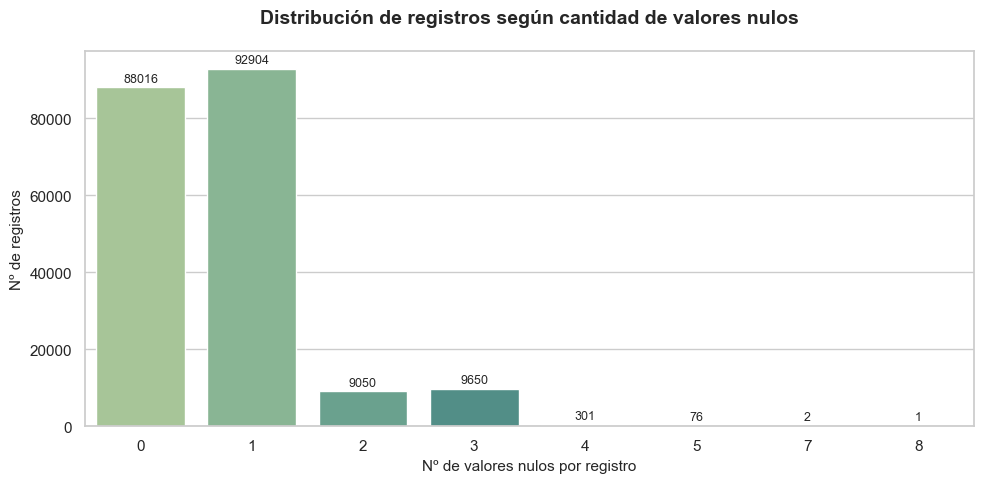

In [7]:
# =============================================================
# 📛 Análisis de valores nulos por registro
# -------------------------------------------------------------
# ➤ Visualiza cuántos registros tienen 0, 1, 2... nulos.
# ➤ Elimina los registros completamente vacíos.
# =============================================================

print("\n➢ Distribucion de registros segun cantidad de valores nulos que contiene cada uno.")

# Calcular el número de nulos por registro
df['nº de nulos'] = df.isnull().sum(axis=1)
df_nulos = df['nº de nulos'].value_counts().sort_index().reset_index()
df_nulos.columns = ['nº de nulos', 'registros']

# 🎨 VISUALIZACIÓN: Distribución de registros según nº de nulos
sns.set_theme(style="whitegrid")

plt.figure(figsize=(10, 5))
ax = sns.barplot(data=df_nulos, x='nº de nulos', y='registros', hue='nº de nulos', palette='crest', legend=False)

# Estética del gráfico
ax.set_title('Distribución de registros según cantidad de valores nulos', fontsize=14, fontweight='bold', pad=20)
ax.set_xlabel('Nº de valores nulos por registro', fontsize=11)
ax.set_ylabel('Nº de registros', fontsize=11)
ax.tick_params(axis='x', rotation=0)

# Etiquetas sobre las barras
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', fontsize=9, padding=2)

plt.tight_layout();

# 🔍 Estadísticas sobre registros completamente nulos
n_completamente_nulos = df[df['nº de nulos'] == df.shape[1] - 1].shape[0]  # -1 porque la columna 'nº de nulos' no existía antes
print(f"\n📛 Registros completamente vacíos: {n_completamente_nulos}")
print(f"📋 Total de registros antes de eliminar vacíos: {df.shape[0]}")

# 🧹 Eliminar registros totalmente nulos
df = df[df['nº de nulos'] < df.shape[1] - 1].copy()
df.drop(columns='nº de nulos', inplace=True)

# ✅ Estadísticas tras limpieza
print(f"✅ Total de registros después de limpieza: {df.shape[0]}")

In [8]:
# =============================================================
# 🧩 Imputación de valores nulos en variables categóricas
# -------------------------------------------------------------
# ➤ Se imputan valores nulos en las variables categóricas usando lógica
#    basada en el significado de la variable y el análisis de frecuencia.
# ➤ La imputación se realiza sobre `cat` y luego se sincroniza `df` y `num`.
# =============================================================

from data_cleaning import imputar_nulos_categoricas

# Mostrar nulos en variables categóricas
print("🔍 Variables categóricas con valores nulos:")
nulos_cat = cat.isnull().sum()
nulos_cat = nulos_cat[nulos_cat > 0]
for col, n in nulos_cat.items():
    print(f"• {col}: {n} nulos")
print()

# Aplicar imputación lógica
cat = imputar_nulos_categoricas(cat)

# Explicación de lógica aplicada
print("🧠 Imputación lógica y justificada:")
print("• 'empleo': imputado como 'OTROS' (categoría general para empleos no especificados).")
for col in ['ingresos_verificados', 'rating', 'vivienda', 'finalidad', 'estado']:
    print(f"• '{col}': no requiere imputación.")

# -------------------------------------------------------------
# 🔁 Sincronización de `df`, `cat` y `num` tras la imputación
# -------------------------------------------------------------

# Actualizar columna imputada en df
df['empleo'] = cat['empleo']

# Volver a separar cat y num sobre el df actualizado
cat = df.select_dtypes(include=["object", "category"]).copy()
num = df.select_dtypes(include="number").copy()

# 🔍 Comprobación final de nulos categóricos
print("\n✅ Nulos en variables categóricas después de imputación:")
print(cat.info())


🔍 Variables categóricas con valores nulos:
• empleo: 14700 nulos

🧠 Imputación lógica y justificada:
• 'empleo': imputado como 'OTROS' (categoría general para empleos no especificados).
• 'ingresos_verificados': no requiere imputación.
• 'rating': no requiere imputación.
• 'vivienda': no requiere imputación.
• 'finalidad': no requiere imputación.
• 'estado': no requiere imputación.

✅ Nulos en variables categóricas después de imputación:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 6 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   empleo                200000 non-null  object
 1   ingresos_verificados  200000 non-null  object
 2   rating                200000 non-null  object
 3   vivienda              200000 non-null  object
 4   finalidad             200000 non-null  object
 5   estado                200000 non-null  object
dtypes: object(6)
memory usage: 9.2+ MB


In [9]:
# =============================================================
# 📉 Imputación de valores nulos en variables numéricas
# -------------------------------------------------------------
# ➤ Se identifican las variables numéricas con nulos.
# ➤ Se aplica una imputación justificada, conservadora y basada en la lógica de negocio.
# ➤ Se actualizan y sincronizan los DataFrames df, num y cat.
# =============================================================

from data_cleaning import imputar_nulos_numericas

# 🔍 Mostrar variables numéricas con valores nulos
print("🔍 Variables numéricas con valores nulos:")
nulos_num = num.isnull().sum()
nulos_num = nulos_num[nulos_num > 0]
for col, n in nulos_num.items():
    print(f"• {col}: {n} nulos")
print()

# 🧠 Explicación lógica de la imputación aplicada
print("🧠 Imputación lógica y justificada por variable:")
print("• 'antiguedad_empleo': mediana (dato omitido no implica 0).")
print("• 'dti': ratio deuda/ingresos. Se imputa con mediana para evitar distorsión por extremos.")
print("• 'num_hipotecas': 0 (ausencia razonable de hipotecas).")
print("• 'porc_tarjetas_75p': 0 (sin tarjetas implica 0%).")
print("• 'porc_uso_revolving': 0 (no hay crédito revolvente).")
print("• 'num_meses_desde_ult_retraso': 0 (sin retrasos registrados).")
print("• 'num_cancelaciones_12meses': 0 (si falta el dato, asumimos 0 cancelaciones).")
print("• 'num_lineas_credito': 0 (sin lineas de credito registradas).")
print("• 'num_derogatorios': 0 (ausencia de registros negativos).")

print("\n🧠 Resto de variables: no requieren imputación.")

for col in ['ingresos', 'num_lineas_credito', 'num_cancelaciones_12meses',
            'num_derogatorios', 'principal', 'tipo_interes', 'num_cuotas',
            'imp_cuota', 'imp_amortizado', 'imp_recuperado']:
    print(f"• '{col}': no requiere ninguna acción.")

# ✨ Aplicar imputación lógica
num = imputar_nulos_numericas(num)

# 🔍 Comprobación final de nulos numéricas
print("\n✅ Nulos en variables numéricas después de imputación:")
print(num.info())

# 🔄 Sincronizar df con num actualizado
for col in num.columns:
    df[col] = num[col]

🔍 Variables numéricas con valores nulos:
• antiguedad_empleo: 12888 nulos
• dti: 147 nulos
• num_hipotecas: 4405 nulos
• num_lineas_credito: 3 nulos
• porc_tarjetas_75p: 6632 nulos
• porc_uso_revolving: 154 nulos
• num_cancelaciones_12meses: 12 nulos
• num_derogatorios: 3 nulos
• num_meses_desde_ult_retraso: 102616 nulos

🧠 Imputación lógica y justificada por variable:
• 'antiguedad_empleo': mediana (dato omitido no implica 0).
• 'dti': ratio deuda/ingresos. Se imputa con mediana para evitar distorsión por extremos.
• 'num_hipotecas': 0 (ausencia razonable de hipotecas).
• 'porc_tarjetas_75p': 0 (sin tarjetas implica 0%).
• 'porc_uso_revolving': 0 (no hay crédito revolvente).
• 'num_meses_desde_ult_retraso': 0 (sin retrasos registrados).
• 'num_cancelaciones_12meses': 0 (si falta el dato, asumimos 0 cancelaciones).
• 'num_lineas_credito': 0 (sin lineas de credito registradas).
• 'num_derogatorios': 0 (ausencia de registros negativos).

🧠 Resto de variables: no requieren imputación.
• '

---
## Gestión de atípicos
---

In [10]:
# =============================================================
# 🧪 Análisis de valores atípicos en variables categóricas
# -------------------------------------------------------------
# ➤ Se consideran atípicas aquellas categorías con una frecuencia
#    relativa inferior al 3% del total de registros.
# ➤ Se imprime para cada variable:
#    - tabla de frecuencias completa
#    - número de categorías atípicas detectadas
#    - conclusiones y decisiones por variable
# ➤ El tratamiento de estos atípicos se pospone a la fase de Feature Engineering.
# =============================================================
from data_cleaning import analizar_atipicos_categoricas

# Ejecutar análisis sobre el dataframe categórico
analizar_atipicos_categoricas(cat)


📊 Análisis de valores atípicos en variables categóricas (frecuencia < 3%):
Variables analizadas: empleo, ingresos_verificados, rating, vivienda, finalidad, estado
----------------------------------------------------------------------------------------------------

📌 Variable: 'empleo'
- Total de categorías: 73273
- Nº de categorías atípicas detectadas: 73272

📋 Tabla completa de frecuencias:


,valor,frecuencia,porcentaje
0,OTROS,14700,7.35
1,Teacher,3532,1.77
2,Manager,3109,1.55
3,Owner,1948,0.97
4,Registered Nurse,1428,0.71
...,...,...,...
73268,Team Detroit,1,0.00
73269,test operator,1,0.00
73270,Web site administrator,1,0.00
73271,Subsea Technician,1,0.00


📝 Conclusión:
• Presenta miles de categorías con muy baja frecuencia. Se sugiere agrupar en 'OTROS'.

----------------------------------------------------------------------------------------------------

📌 Variable: 'ingresos_verificados'
- Total de categorías: 3
- No se han detectado categorías atípicas en esta variable.

📋 Tabla completa de frecuencias:


,valor,frecuencia,porcentaje
0,Source Verified,78405,39.20
1,Not Verified,66045,33.02
2,Verified,55550,27.78


📝 Conclusión:
• Tiene solo 3 categorías frecuentes. No requiere transformación.

----------------------------------------------------------------------------------------------------

📌 Variable: 'rating'
- Total de categorías: 7
- Nº de categorías atípicas detectadas: 2

📋 Tabla completa de frecuencias:


,valor,frecuencia,porcentaje
0,B,58555,29.28
1,C,57430,28.72
2,A,38504,19.25
3,D,28679,14.34
4,E,12011,6.01
5,F,3729,1.86
6,G,1092,0.55


📝 Conclusión:
• Las categorías 'F' y 'G' son poco frecuentes. Podrían agruparse como 'rating_bajo'.

----------------------------------------------------------------------------------------------------

📌 Variable: 'vivienda'
- Total de categorías: 6
- Nº de categorías atípicas detectadas: 3

📋 Tabla completa de frecuencias:


,valor,frecuencia,porcentaje
0,MORTGAGE,98269,49.13
1,RENT,79367,39.68
2,OWN,22263,11.13
3,ANY,82,0.04
4,OTHER,16,0.01
5,NONE,3,0.00


📝 Conclusión:
• Tiene una categoría poco común ('OTROS'). Puede evaluarse su fusión con otra categoría.

----------------------------------------------------------------------------------------------------

📌 Variable: 'finalidad'
- Total de categorías: 14
- Nº de categorías atípicas detectadas: 10

📋 Tabla completa de frecuencias:


,valor,frecuencia,porcentaje
0,debt_consolidation,113478,56.74
1,credit_card,45185,22.59
2,home_improvement,13136,6.57
3,other,12358,6.18
4,major_purchase,4542,2.27
5,medical,2428,1.21
6,small_business,2287,1.14
7,car,2046,1.02
8,vacation,1433,0.72
9,moving,1418,0.71


📝 Conclusión:
• Presenta variedad moderada. Se evaluará si es necesario agrupar según frecuencia o semántica.

----------------------------------------------------------------------------------------------------

📌 Variable: 'estado'
- Total de categorías: 9
- Nº de categorías atípicas detectadas: 6

📋 Tabla completa de frecuencias:


,valor,frecuencia,porcentaje
0,Fully Paid,95311,47.66
1,Current,77760,38.88
2,Charged Off,23599,11.80
3,Late (31-120 days),1917,0.96
4,In Grace Period,767,0.38
5,Late (16-30 days),399,0.20
6,Does not meet the credit policy. Status:Fully Paid,166,0.08
7,Does not meet the credit policy. Status:Charged Off,78,0.04
8,Default,3,0.00


📝 Conclusión:
• Variable objetivo (target). No se modifica en esta etapa.

----------------------------------------------------------------------------------------------------

📌 El tratamiento de estas categorías atípicas se realizará en la fase de *Feature Engineering*.


In [11]:
# =============================================================
# 📉 Análisis de valores atípicos en variables numéricas
# -------------------------------------------------------------
# ➤ Aplica el criterio ±3 desviaciones estándar para detectar outliers.
# ➤ Muestra estadísticas clave, valores extremos y proporción de atípicos.
# ➤ No se realiza eliminación ni transformación — solo diagnóstico.
# ➤ Las decisiones se tomarán en la fase de EDA y Feature Engineering.
# =============================================================

from data_cleaning import analizar_outliers_numericos

# Ejecutar análisis de outliers
analizar_outliers_numericos(num)


➤ Análisis de outliers usando ±3 desviaciones típicas
Variables analizadas: antiguedad_empleo, ingresos, dti, num_hipotecas, num_lineas_credito, porc_tarjetas_75p, porc_uso_revolving, num_cancelaciones_12meses, num_derogatorios, num_meses_desde_ult_retraso, principal, tipo_interes, num_cuotas, imp_cuota, imp_amortizado, imp_recuperado
----------------------------------------------------------------------------------------------------

📈 Variable: 'antiguedad_empleo'
- Media: 6.01
- Desviación típica: 3.46
- Límite inferior: -4.38
- Límite superior: 16.41
- Valor mínimo: 1.00
- Valor máximo: 10.00
- Valor máximo válido: 10.00
- Registros fuera de rango: 0 (0.00%)
----------------------------------------------------------------------------------------------------

📈 Variable: 'ingresos'
- Media: 78,208.20
- Desviación típica: 83,983.19
- Límite inferior: -173,741.36
- Límite superior: 330,157.75
- Valor mínimo: 0.00
- Valor máximo: 10,999,200.00
- Valor máximo válido: 330,000.00
- Regis

In [ ]:
# ================================================== #
# ELIMINACIÓN DE REGISTROS CON INGRESOS EXTREMOS (> 300.000)
# ================================================== #

# Guardar dimensiones antes del filtrado
dim_df_antes = df.shape
dim_cat_antes = cat.shape
dim_num_antes = num.shape

# Contar registros a eliminar
registros_a_eliminar = df[df['ingresos'] > 300000].shape[0]
print(f"\nRegistros eliminados con ingresos > 300.000: {registros_a_eliminar}")

# Filtrar df
df = df[df['ingresos'] <= 300000]

# Sincronizar cat y num con los índices actuales de df
cat = cat.loc[df.index].copy()
num = num.loc[df.index].copy()

# Guardar dimensiones después del filtrado
dim_df_despues = df.shape
dim_cat_despues = cat.shape
dim_num_despues = num.shape


🧹 Registros eliminados con ingresos > 300.000: 1321


In [13]:
print(f"\n✅ Dimensiones antes del filtrado: df={dim_df_antes}, cat={dim_cat_antes}, num={dim_num_antes}")
print(f"✅ Dimensiones después del filtrado: df={dim_df_despues}, cat={dim_cat_despues}, num={dim_num_despues}")


✅ Dimensiones antes del filtrado: df=(200000, 22), cat=(200000, 6), num=(200000, 16)
✅ Dimensiones después del filtrado: df=(198679, 22), cat=(198679, 6), num=(198679, 16)


---
## Guardar copia de DataFrame para trabajo
---

In [14]:
# =============================================================
# 💾 Guardado de datos tras limpieza
# -------------------------------------------------------------
# ➤ Se guardan los DataFrames procesados:
#     - `df`: datos combinados
#     - `cat`: solo variables categóricas
#     - `num`: solo variables numéricas
# ➤ Cada uno se guarda en:
#     - Formato binario (.pkl) en data/cache
#     - Formato texto (.csv) en data/processed
# =============================================================

from utils import guardar_multiples_archivos

guardar_multiples_archivos({"trabajo_cleaning": df, "cat_cleaning": cat, "num_cleaning": num})

✅ Archivo guardado en: data/cache/trabajo_cleaning.pkl
✅ Archivo guardado en: data/processed/trabajo_cleaning.csv
✅ Archivo guardado en: data/cache/cat_cleaning.pkl
✅ Archivo guardado en: data/processed/cat_cleaning.csv
✅ Archivo guardado en: data/cache/num_cleaning.pkl
✅ Archivo guardado en: data/processed/num_cleaning.csv
